In [1]:
import torch
import torch.nn as nn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set(color_codes=True)

In [2]:
from cifar10_cnn import Cifar10CNN

In [3]:
model = Cifar10CNN()

Загрузим обученные параметры модели

In [4]:
device = torch.device('cpu')
model.load_state_dict(torch.load("../model/cifar10_cnn.pt",  map_location=device))
model.eval()

Cifar10CNN(
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(512, 512, kernel_size=(3,

In [13]:
weigths = model.state_dict()["linear3.weight"].numpy().flatten()

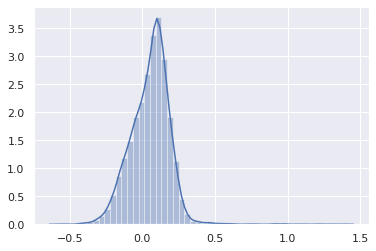

In [14]:
sns.distplot(weigths)

Для оценки вкалда весов можно использовать понятие Энтропии Шеннона. Уровень энтропии указывает на упорядоченность в системе. Задача классификации как раз и заключается в упорядочивании системы изображений. Чем больше увеличивается энтропия при удалении весов, тем больший вклад веса данного диапазона несут в себе информации.

In [15]:
model_info = torch.load("../model/cifar10_cnn.pt",  map_location=device)

In [16]:
model_info

OrderedDict([('conv1.weight', tensor([[[[ 0.1155, -0.2447, -0.0630],
                        [ 0.2616, -0.4528,  0.1350],
                        [-0.0080,  0.2644,  0.0153]],
              
                       [[ 0.0783,  0.0604,  0.1262],
                        [ 0.1358, -0.3322,  0.0136],
                        [-0.1164,  0.1167, -0.0881]],
              
                       [[ 0.2503,  0.0519, -0.0764],
                        [-0.0101, -0.1892, -0.1325],
                        [-0.1025,  0.1340,  0.0734]]],
              
              
                      [[[ 0.1219, -0.2128,  0.1455],
                        [ 0.0869,  0.3851,  0.1635],
                        [-0.2961, -0.2599, -0.1743]],
              
                       [[ 0.2041, -0.1108, -0.0363],
                        [ 0.0030,  0.3679, -0.2201],
                        [ 0.1749, -0.0239, -0.2685]],
              
                       [[ 0.1351, -0.1599, -0.0065],
                        [ 0.0231,  0.117